In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=2eb33fe00fbd3ca8f94da4ee44b9bd587f1a49c4a4e56a6b6203f6813e8e8acb
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import PCA
# Инициализация модели PCA
pca = PCA(n_components=4)
# Обучение модели на обучающем наборе данных
pca.fit(X_train)
# Преобразование данных в новое признаковое пространство
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

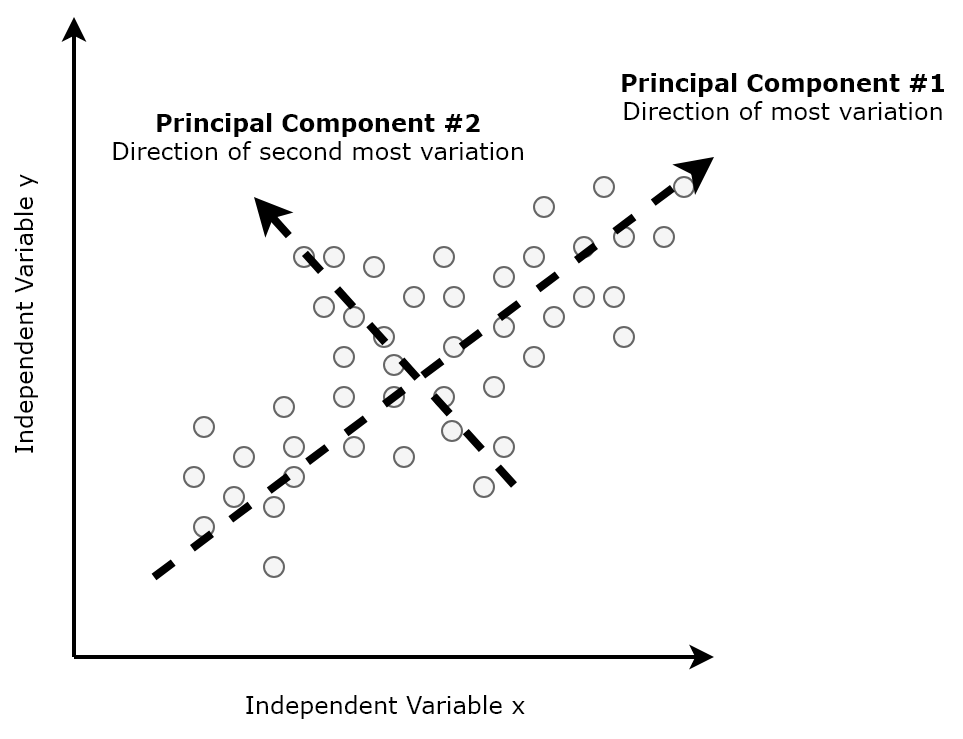

In [ ]:
# Пример использования PCA для снижения размерности данных
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)

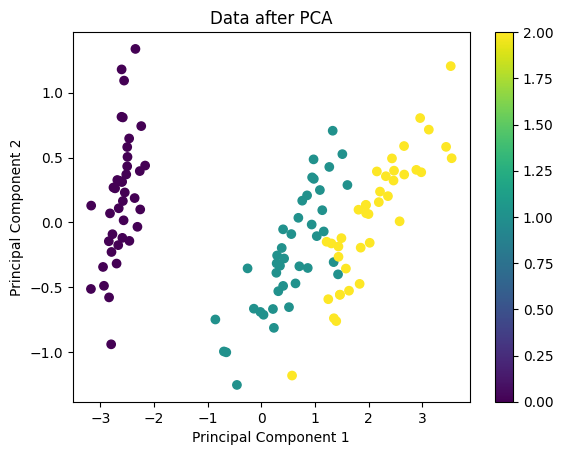

In [ ]:
import matplotlib.pyplot as plt
# Визуализация данных после применения PCA
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA')
plt.colorbar()
plt.show()

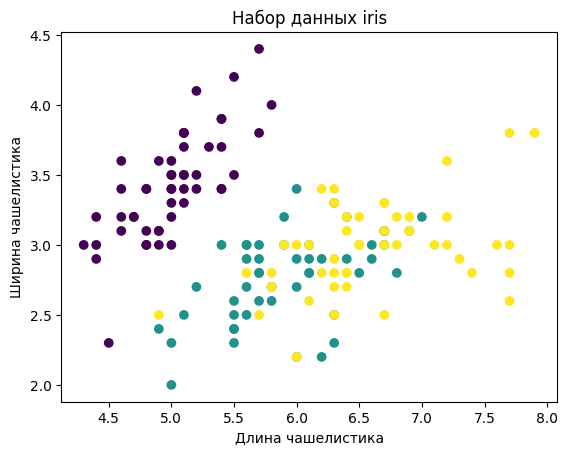

In [ ]:
# Создание графика рассеяния для первых двух признаков
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина чашелистика')
plt.title('Набор данных iris')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
# Инициализация и обучение модели машинного обучения
model = LogisticRegression()
model.fit(X_train_pca, y_train)
# Оценка производительности модели
accuracy = model.score(X_test_pca, y_test)
accuracy

1.0

# 1. Попробуйте различные значения числа компонент в PCA и сравните их влияние на производительность модели.

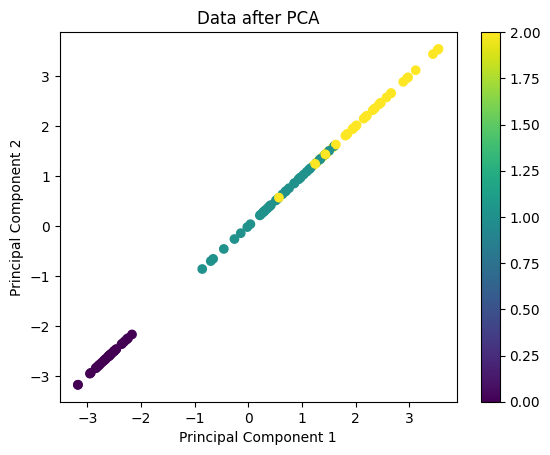

Число компонент: 1, Точность: 0.9666666666666667


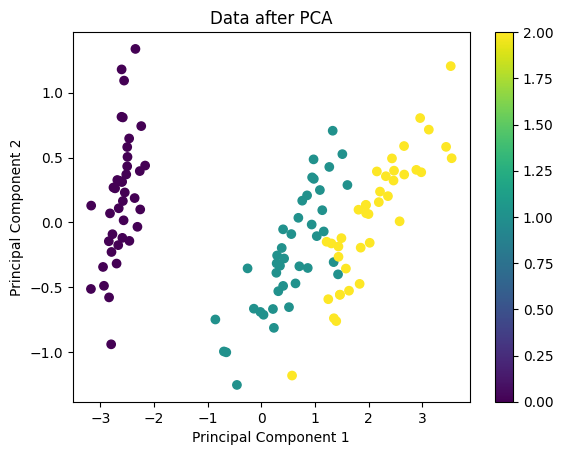

Число компонент: 2, Точность: 1.0


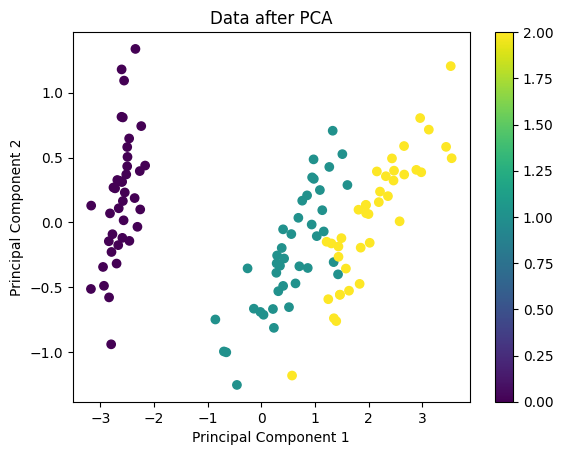

Число компонент: 3, Точность: 1.0


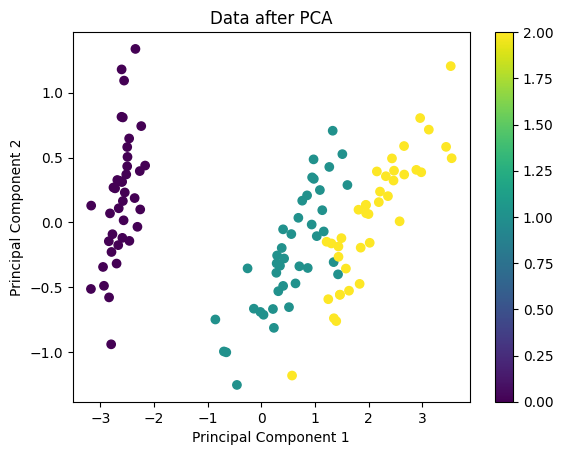

Число компонент: 4, Точность: 1.0


In [ ]:
# Список значений числа компонент для эксперимента
n_components_list = [1, 2, 3, 4]

# Обучение и оценка моделей с разными значениями числа компонент
for n_components in n_components_list:
    # Создание модели PCA с заданным числом компонент
    pca = PCA(n_components=n_components)

    # Преобразование данных с использованием PCA
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    if n_components >= 2:
        plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('Data after PCA')
        plt.colorbar()
        plt.show()
    else:
        plt.scatter(X_train_pca[:, 0], X_train_pca[:, 0], c=y_train, cmap='viridis')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('Data after PCA')
        plt.colorbar()
        plt.show()

    # Обучение модели на преобразованных данных
    model = LogisticRegression()
    model.fit(X_train_pca, y_train)

    # Оценка производительности модели
    accuracy = model.score(X_test_pca, y_test)

    # Вывод результата
    print(f"Число компонент: {n_components}, Точность: {accuracy}")

# 2. Исследуйте возможности использования PCA в комбинации с другими методами снижения размерности, такими как t-SNE или UMAP

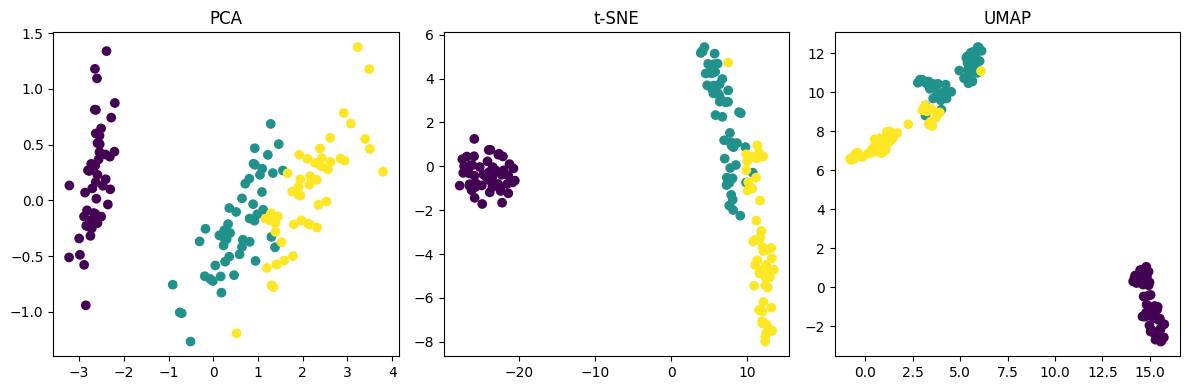

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# UMAP
umap = UMAP(n_components=2)
X_umap = umap.fit_transform(X)

# Рисуем результаты
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA')

plt.subplot(1, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('t-SNE')

plt.subplot(1, 3, 3)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y)
plt.title('UMAP')

plt.tight_layout()
plt.show()

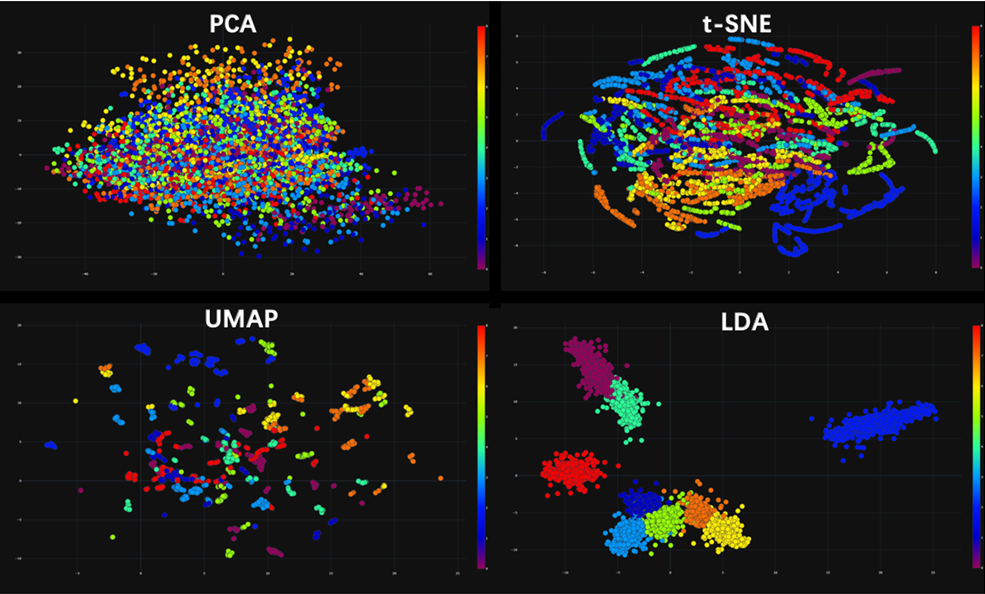

# инициализация t-SNE, UMAP через PCA

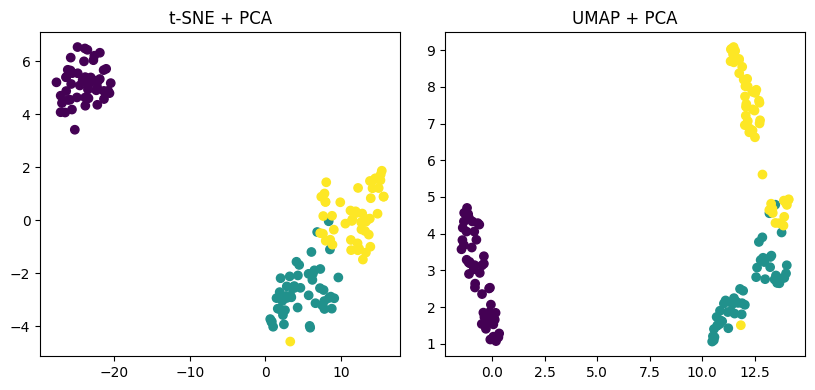

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Применяем PCA для снижения размерности данных
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Используем результаты PCA в качестве начальных значений для t-SNE
tsne = TSNE(n_components=2, init=X_pca)
X_tsne = tsne.fit_transform(X)

# Используем результаты PCA в качестве начальных значений для UMAP
umap = UMAP(n_components=2, init=X_pca)
X_umap = umap.fit_transform(X)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('t-SNE + PCA')

plt.subplot(1, 3, 3)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y)
plt.title('UMAP + PCA')

plt.tight_layout()
plt.show()